In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree

### K-means

In [ ]:
data=pd.read_csv("data.csv")
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
selected_columns = [
    'diagnosis',
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean'
]

df = data[selected_columns]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
df.dropna()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

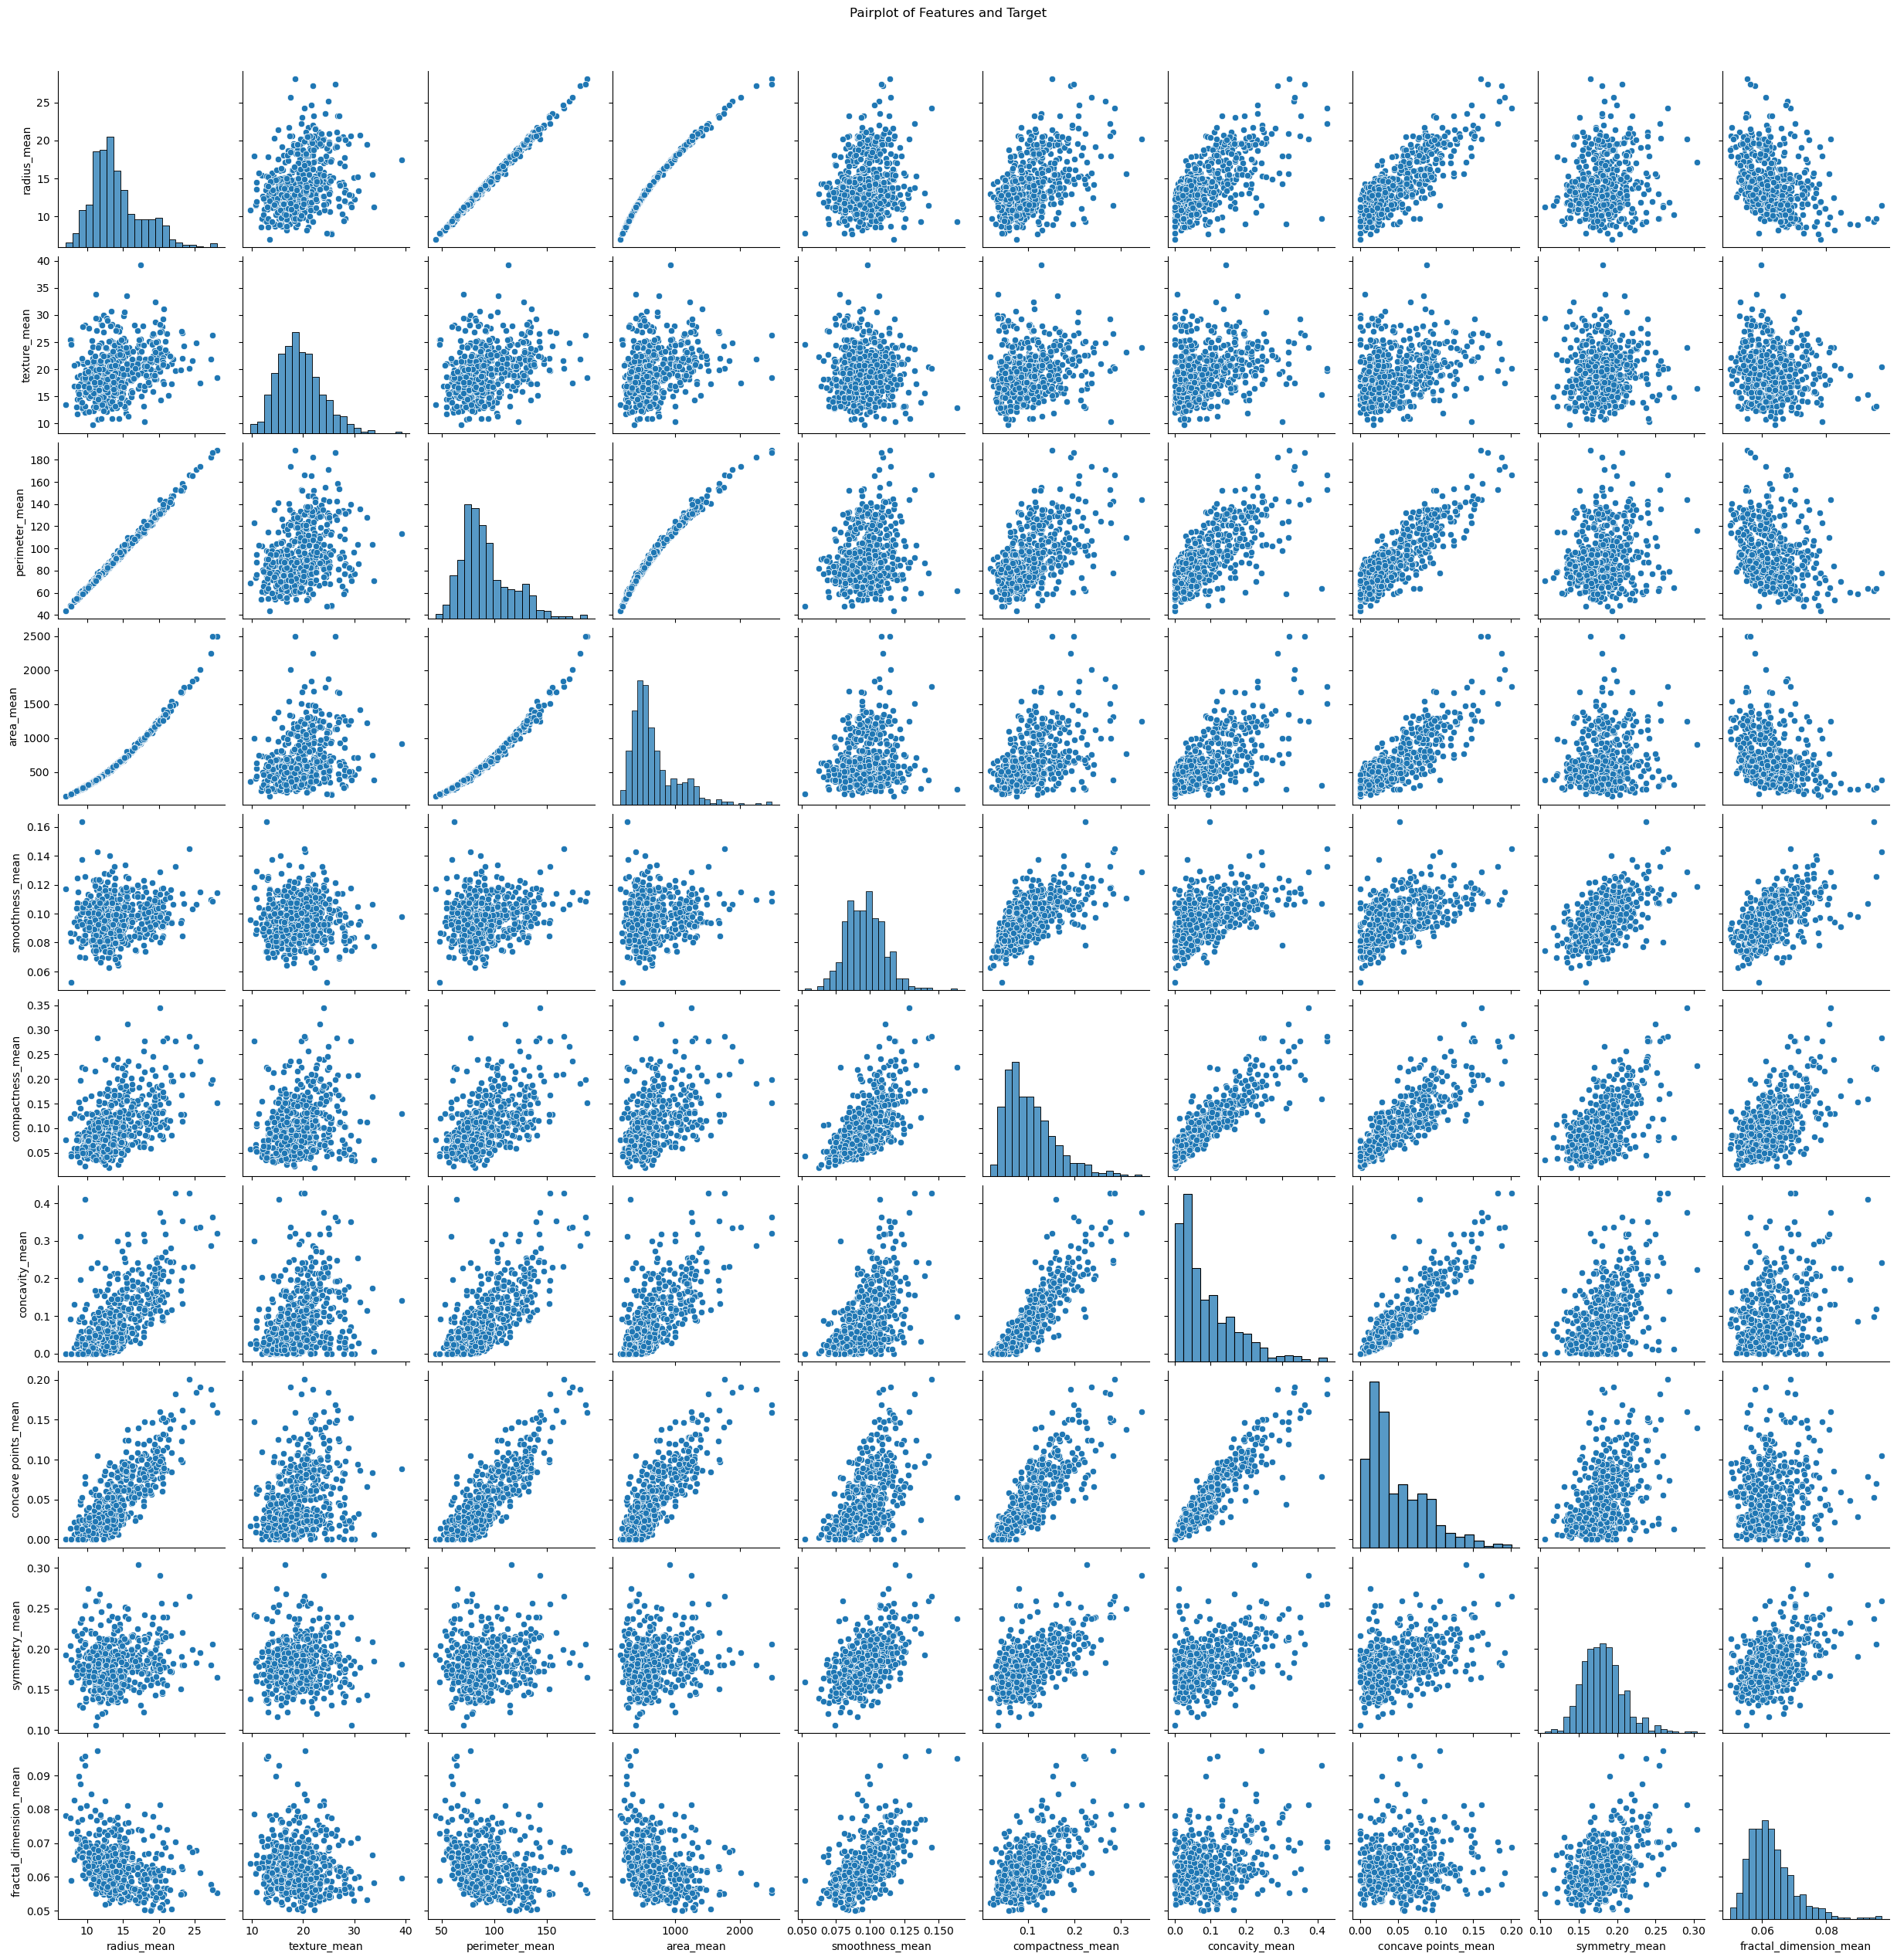

In [ ]:
sns.pairplot(df)
plt.suptitle("Pairplot of Features and Target", y=1.02)
plt.show()

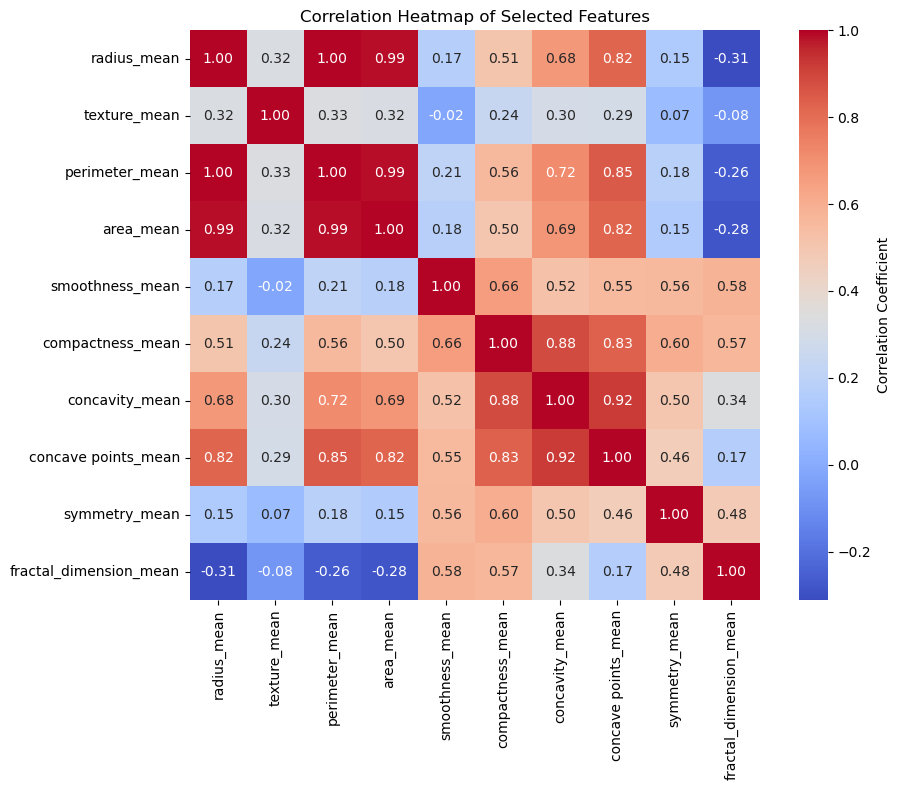

In [ ]:
correlation_matrix = df.drop(columns=['diagnosis']).corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"label": "Correlation Coefficient"}
)

plt.title("Correlation Heatmap of Selected Features")
plt.tight_layout()
plt.show()

radius_mean & perimeter_mean（0.99）

radius_mean & area_mean（0.99）

perimeter_mean & area_mean（0.99）

concavity_mean & concave points_mean（0.92）

compactness_mean & concavity_mean（0.88）

/var/folders/_y/qjc9138x7wn_srmry0sr3zjm0000gn/T/ipykernel_5643/2815637561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='diagnosis', palette='Set2')


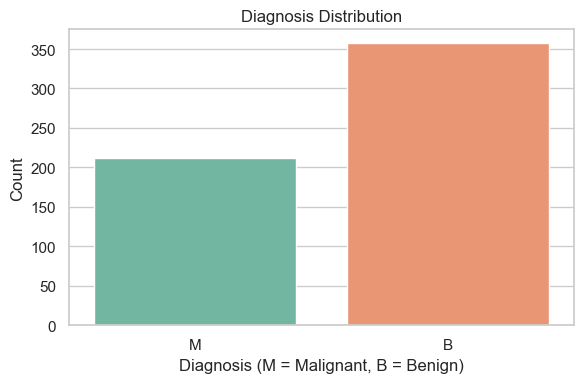

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(df, x='diagnosis', palette='Set2')

plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

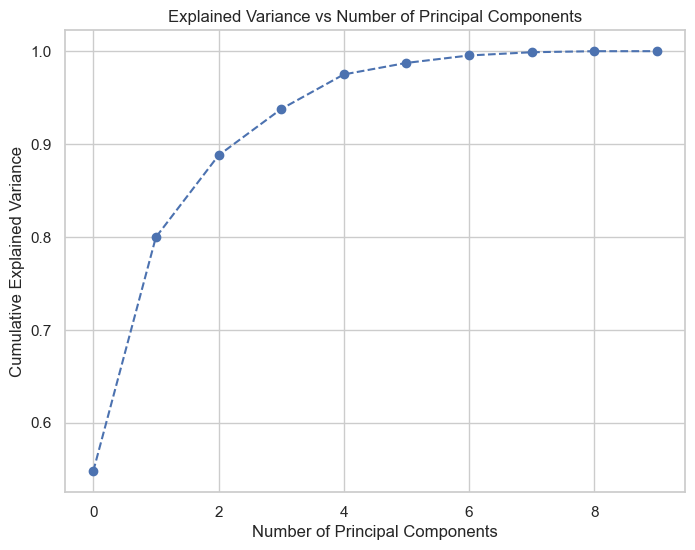

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Principal Components")
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
X_pca

,PC1,PC2,PC3,PC4,PC5
0,5.224155,3.204428,-2.171340,-0.169276,-1.514252
1,1.728094,-2.540839,-1.019679,0.547539,-0.312330
2,3.969757,-0.550075,-0.323569,0.397964,0.322877
3,3.596713,6.905070,0.792832,-0.604828,-0.243176
4,3.151092,-1.358072,-1.862234,-0.185251,-0.311342
...,...,...,...,...,...
564,4.436781,-2.020670,-0.457737,-0.472738,0.802882
565,2.874757,-2.395235,1.169465,0.073879,0.745189
566,0.649583,-2.041783,1.710966,-0.271559,0.101971
567,6.905664,1.216243,1.640120,0.153472,-0.405966


In [ ]:
X = X_pca
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## logistic model

In [ ]:
# Fit a logistic regression model to the training set
log_reg = LogisticRegression(max_iter=5000, random_state=42)  # Increase max_iter to ensure convergence
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [ ]:
# Report the mean squared error on the test set
y_pred = log_reg.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

log_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with logistic regression: ", log_accuracy)

=== Classification Report ===
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        71
   Malignant       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

=== Confusion Matrix ===
[[70  1]
 [ 4 39]]
Test accuracy with logistic regression:  0.956140350877193


## KNN

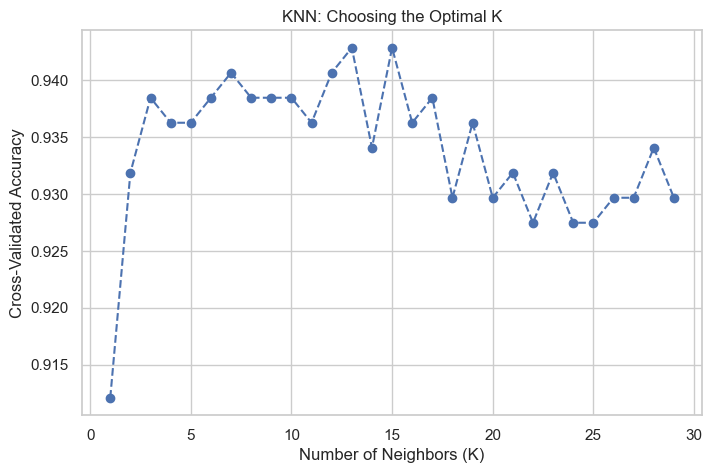

In [ ]:
k_values = range(1, 30)

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN: Choosing the Optimal K")
plt.show()

In [ ]:
# Determine the best K
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal K: {optimal_k}")

# Train the k-NN classifier with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn_optimal.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

knn_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with KNN: ", knn_accuracy)

Optimal K: 13
=== Classification Report ===
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96        71
   Malignant       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

=== Confusion Matrix ===
[[69  2]
 [ 4 39]]
Test accuracy with KNN:  0.9473684210526315


## SVM

In [ ]:
svm = SVC()

# Define the grid for GridSearchCV
param_grid = {
    'C': [0.1,  1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy from GridSearchCV
print("Best parameters found by GridSearchCV: ", grid_search.best_params_)
print("Best accuracy from GridSearchCV: ", grid_search.best_score_)


Best parameters found by GridSearchCV:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy from GridSearchCV:  0.9428571428571428


In [ ]:
# Test the model with the best parameters found by GridSearchCV
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

svm_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with SVM: ", svm_accuracy)

=== Classification Report ===
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

=== Confusion Matrix ===
[[70  1]
 [ 2 41]]
Test accuracy with SVM:  0.9736842105263158


## decision tree

In [ ]:
model = DecisionTreeClassifier(random_state=42)
# Define hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 6)),
    'min_samples_leaf': list(range(1, 6))
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found by GridSearchCV: ", grid_search.best_params_)
print("Best accuracy from GridSearchCV: ", grid_search.best_score_)

Best parameters found by GridSearchCV:  {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
Best accuracy from GridSearchCV:  0.9208791208791209


In [ ]:
# Fit the model with the best parameters
best_params = grid_search.best_params_
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_dt.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

dt_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with decision tree: ", dt_accuracy)

=== Classification Report ===
              precision    recall  f1-score   support

      Benign       0.94      0.94      0.94        71
   Malignant       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

=== Confusion Matrix ===
[[67  4]
 [ 4 39]]
Test accuracy with decision tree:  0.9298245614035088


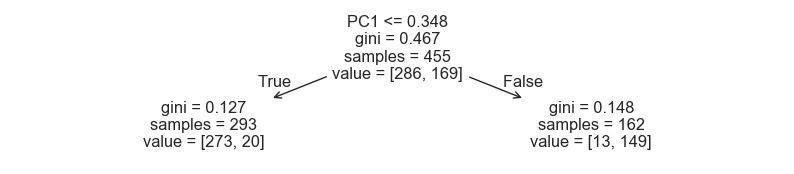

In [ ]:
plt.figure(figsize=(10, 2))  # customize according to the size of your tree
plot_tree(best_dt, feature_names = X_train.columns)
plt.show()

In [ ]:
print("logistic model accuracy",log_accuracy)
print("KNN model accuracy",knn_accuracy)
print("SVM model accuracy",svm_accuracy)
print("decision tree accuracy",dt_accuracy)

logistic model accuracy 0.956140350877193
KNN model accuracy 0.9473684210526315
SVM model accuracy 0.9736842105263158
decision tree accuracy 0.9298245614035088
